<a href="https://colab.research.google.com/github/hajime-8123/AI-Application-repository/blob/main/week9_lab%26lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
import logging
tf.get_logger().setLevel(logging.ERROR)

EPOCHS = 100
BATCH_SIZE = 16
TRAIN_TEST_SPLIT = 0.8
MIN = 12
FILE_NAME = 'book_store_sales.csv'

def readfile(file_name):
  file = open(file_name, 'r', encoding ='utf-8')
  next(file)
  data= []
  for line in (file):
    values = line.split(',')
    data.append(float(values[1]))
  file.close()
  return np.array(data, dtype=np.float32)

#Read data and split into training and test data.
sales = readfile(FILE_NAME)
months = len(sales)
split = int(months * TRAIN_TEST_SPLIT)
train_sales = sales[0:split]
test_sales = sales[split:]

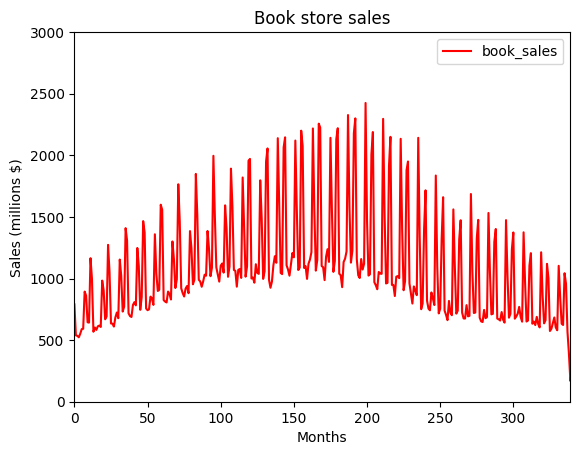

In [ ]:

x = range(len(sales))
plt.plot(x, sales, 'r-', label='book_sales')
plt.title('Book store sales')
plt.axis([0, 339, 0.0, 3000.0])
plt.xlabel('Months')
plt.ylabel('Sales (millions $)')
plt.legend()
plt.show()

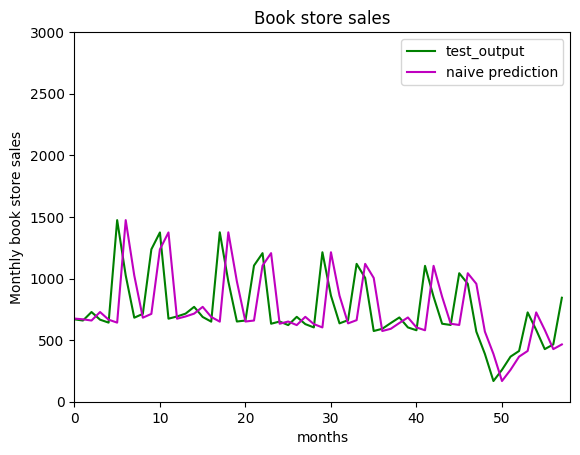

In [ ]:

# Plot naive prediction
test_output = test_sales[MIN:]
naive_prediction = test_sales[MIN-1:-1]
x = range(len(test_output))
plt.plot(x, test_output, 'g-', label='test_output')
plt.plot(x, naive_prediction, 'm-', label='naive prediction')
plt.title('Book store sales')
plt.axis([0, len(test_output), 0.0, 3000.0])
plt.xlabel('months')
plt.ylabel('Monthly book store sales')
plt.legend()
plt.show()

In [ ]:

# Standardize train and test data
# Use only training seasons to compute mean and stddev.
mean = np.mean(train_sales)
stddev = np.std(train_sales)
train_sales_std = (train_sales - mean)/stddev
test_sales_std = (test_sales - mean)/stddev


In [ ]:
# Create training examples.
train_months = len(train_sales)
train_X = np.zeros((train_months - MIN, MIN, 1))
train_y = np.zeros((train_months - MIN, 1))

for i in range(0, train_months - MIN):
    train_X[i, :, 0] = train_sales[i:i + MIN]
    train_y[i, 0] = train_sales[i + MIN]

# Create test examples
test_months = len(test_sales)
test_X = np.zeros((test_months - MIN, MIN, 1))
test_y = np.zeros((test_months - MIN, 1))

for i in range(0, test_months - MIN):
    test_X[i, :, 0] = test_sales[i:i + MIN]
    test_y[i, 0] = test_sales[i + MIN]


In [ ]:

# Create RNN model
model = Sequential()
model.add (SimpleRNN(128, activation='relu',
                      input_shape= (None, 1)))
model.add(Dense(1, activation= 'linear'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

history = model.fit(train_X, train_y,
                    validation_data=(test_X, test_y),
                    epochs=EPOCHS, batch_size=BATCH_SIZE,
                    verbose=2, shuffle=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               16640     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 16769 (65.50 KB)
Trainable params: 16769 (65.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
17/17 - 2s - loss: 577265.1875 - mean_absolute_error: 623.9333 - val_loss: 79214.8828 - val_mean_absolute_error: 224.5621 - 2s/epoch - 120ms/step
Epoch 2/100
17/17 - 0s - loss: 190411.1562 - mean_absolute_error: 330.0798 - val_loss: 62138.8984 - val_mean_absolute_error: 204.6217 - 106ms/epoch - 6ms/step
Epoch 3/100
17/17 - 0s - loss: 120997.1406 - mean_absolute_error: 258.8470 - val_loss: 37511.0664 -

In [ ]:
# Create naive prediction based on standardized data.
test_output = test_sales_std[MIN:]
naive_prediction = test_sales_std[MIN-1:-1]
mean_squared_error = np.mean(np.square(naive_prediction
- test_output))
mean_abs_error = np.mean(np.abs(naive_prediction
- test_output))
print('naive test mse: ', mean_squared_error)
print('naive test mean abs: ', mean_abs_error)


naive test mse:  0.4723033
naive test mean abs:  0.48052385


1/1 [==============================] - 0s 243ms/step


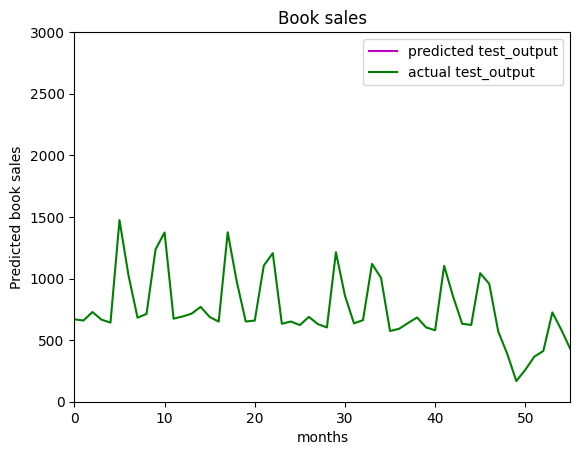

In [ ]:
# Use trained model to predict the test data
predicted_test = model.predict(test_X, len(test_X))
predicted_test = np.reshape(predicted_test,
(len(predicted_test)))
predicted_test = predicted_test * stddev + mean
# Plot test prediction.
x = range(len(test_sales)-MIN)
plt.plot(x, predicted_test, 'm-',
label='predicted test_output')
plt.plot(x, test_sales[-(len(test_sales)-MIN):],
'g-', label='actual test_output')
plt.title('Book sales')
plt.axis([0, 55, 0.0, 3000.0])
plt.xlabel('months')
plt.ylabel('Predicted book sales')
plt.legend()
plt.show()

**WEEK 9 - LAB (Continuation)**

170498071/170498071 [==============================] - 3s 0us/step
Category:  [8]


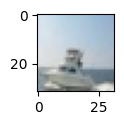

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import logging
tf.get_logger().setLevel(logging.ERROR)

(train_data, train_labels), (test_data, test_labels) = keras.datasets.cifar10.load_data()

print('Category: ', train_labels[100])
plt.figure(figsize=(1,1))
plt.imshow(train_data[100])
plt.show()

In [38]:

# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the pre-trained VGG16 model
model = VGG16(weights='imagenet')

# Load an example image
img_path = 'path_to_image.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions
predictions = model.predict(x)
decoded_predictions = decode_predictions(predictions, top=5)[0]

# Display top predictions
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")


UnidentifiedImageError: ignored

In [39]:

# Load the VGG16 model with pre-trained weights
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the VGG16 model with pre-trained weights (excluding top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a custom top model for your specific classification task
top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(num_classes, activation='softmax'))  # Adjust num_classes

# Combine the base model with the custom top model
model = Sequential([base_model, top_model])

# Compile the model and specify optimizer, loss, and metrics
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on your custom dataset
model.fit(train_data, train_labels, epochs=epochs, batch_size=batch_size)


NameError: ignored

In [42]:
# Load the VGG16 model without the top layers
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model

# Load VGG16 model without top ( fully connected ) layers
base_model = VGG16 ( weights ='imagenet', include_top = False )

# Create a new model that extracts features from intermediate layers
feature_extraction_model = Model ( inputs = base_model .input , outputs =
base_model . get_layer ('block4_pool'). output )

# Load and preprocess an image
img_path = 'sample.png'
img = image.load_img(img_path, target_size =(224 , 224))
x = image.img_to_array ( img )
x = np.expand_dims (x , axis =0)
x = preprocess_input (x)

# Extract features from the image
features = feature_extraction_model . predict (x)

# The ’features ’ variable now contains the extracted features

UnidentifiedImageError: ignored